# Result_Fig3_1 : Difficulty with Tag Availability

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)




In [2]:

from lib.distribution_collector import (collect_tag_distributions, collect_topic_distributions)
from utils.statistics import calculate_gini, calculate_entropy, get_dist_x_div
from constants import CONSTANTS

from matplotlib import pyplot as plt
import numpy as np
import lib.stats.stats as st
import pickle


In [3]:
path = CONSTANTS.s_diff_da_result_path
file_list = os.listdir(f'{path}/agg')


In [4]:
with open(f'{path}/agg/tag_distribution.pkl', 'rb') as f:
    tag_distribution = pickle.load(f)

In [5]:
diff_dict = {'0' : 'Basic', '1' : 'Intermediate', '2' : 'Advanced'}


In [6]:
t_gini_dict, t_entropy_dict = dict(), dict()
for diff_str, distribution in tag_distribution.items():
    t_entropy_dict[diff_str] = list(map(lambda x: calculate_entropy(list(x.values())), distribution))
    t_gini_dict[diff_str] = list(map(lambda x: calculate_gini(list(x.values())), distribution))
    


In [7]:
alpha_dict = {0 : 'A. ', 1  : 'B. ', 2 : 'C. '}

In [8]:
t_coef_dict = dict()
t_coef_dict[0] = t_gini_dict
t_coef_dict[1] = t_entropy_dict

In [9]:
def calc_chow(x, y):
    st_ = st.Stats(np.array(x), np.array(y), 2, 0.95)
    F_stat, p_value = st_.chow_test()
    return st_, F_stat, p_value
    

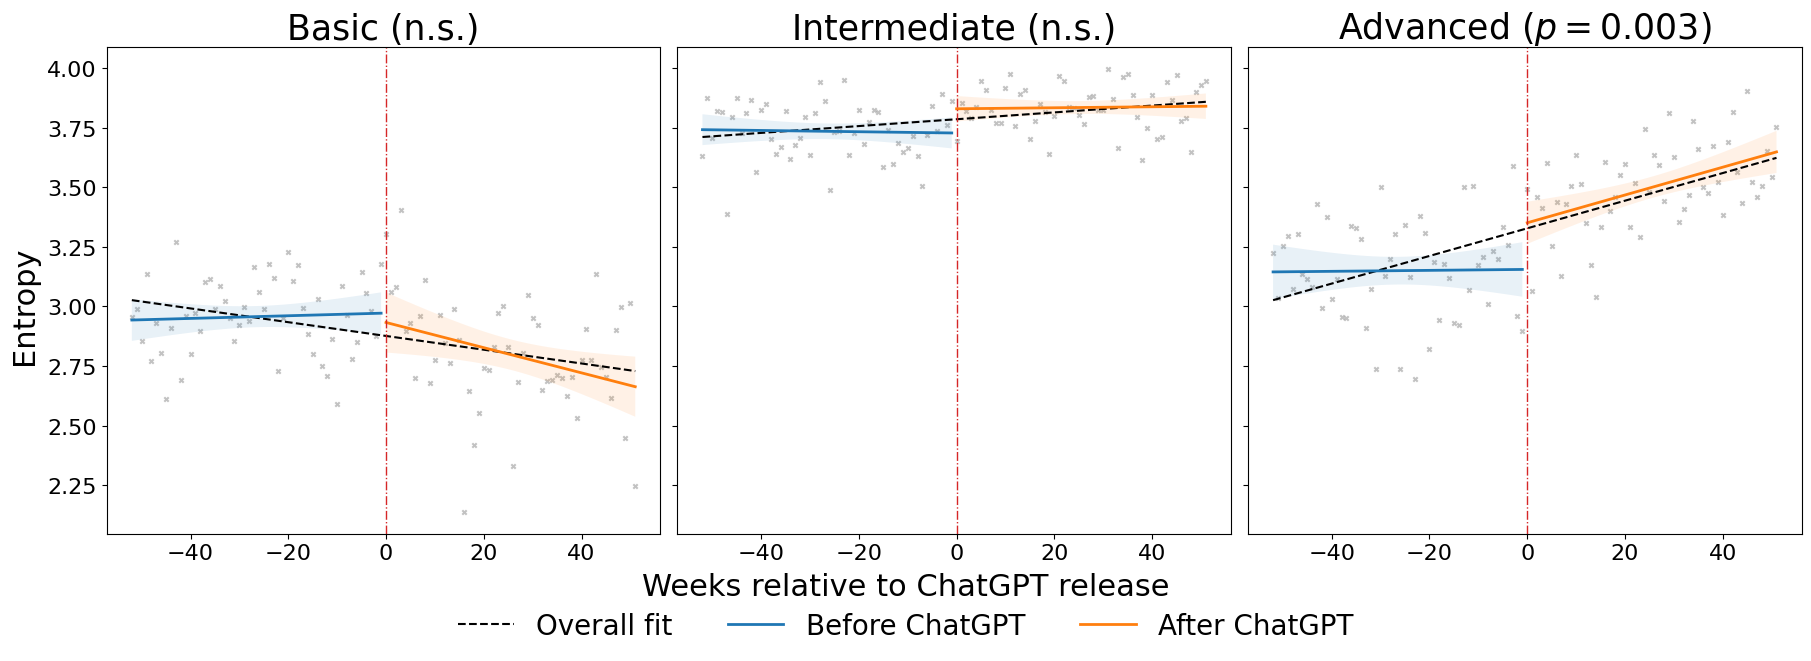

In [10]:

fig, axs = plt.subplots(1, 3, figsize = (18, 6), sharey=True, sharex=True, constrained_layout=True)

coef_dict = t_coef_dict[1]
[1]
for v_idx in coef_dict.keys():
    list_ = coef_dict[v_idx]
    x_rel, divider = get_dist_x_div(list_)
    st_, F_stat_, p_value_ = calc_chow(x_rel, list_)

    h_idx, v_idx = 1, int(v_idx)
    axs[v_idx].scatter(x_rel, list_, color = 'darkgray', alpha = 0.7,  s=10, marker='x')
    axs[v_idx].plot(x_rel, st_.y_predict, label="Overall fit", linestyle="--", color="black")  

    axs[v_idx].plot(x_rel[:divider], st_.y1_predict, label="Before ChatGPT", linewidth='2')
    axs[v_idx].fill_between(x_rel[:divider], st_.y1_predict - st_.y1_conf_interval, st_.y1_predict + st_.y1_conf_interval, alpha=0.1)

    axs[v_idx].plot(x_rel[divider:], st_.y2_predict, label="After ChatGPT", linewidth='2')
    axs[v_idx].fill_between(x_rel[divider:], st_.y2_predict - st_.y2_conf_interval, st_.y2_predict + st_.y2_conf_interval, alpha=0.1)

    axs[v_idx].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
    pv = '(n.s.)' if p_value_ > 0.05 else f'($p = ${p_value_:.3f})'
    axs[v_idx].set_title(f"{diff_dict[str(v_idx)]} {pv}", fontsize = 25)


fig.supxlabel("Weeks relative to ChatGPT release", fontsize=22)
fig.supylabel("Entropy", fontsize=22)


axs[0].tick_params(axis='y', labelsize=16)
axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)

handles, labels = axs[2].get_legend_handles_labels()
fig.legend(
    handles=handles,
    labels=labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=4,
    fontsize=20,
    frameon=False
)

fig.savefig(f"./fig/C_Result_Fig3_1.png", dpi=300, bbox_inches='tight')
plt.show();
